In [12]:
from comp_chem_agent.agent.llm_graph import *
%load_ext autoreload
%autoreload 2

workflow_type = "manager_worker"
cca = llm_graph(model_name='gpt-4o-mini', workflow_type = workflow_type, structured_output=False)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2025-04-28 12:57:16,196 - comp_chem_agent.tools.openai_loader - INFO - Loading OpenAI model: gpt-4o-mini
2025-04-28 12:57:16,204 - comp_chem_agent.tools.openai_loader - INFO - Requested model: gpt-4o-mini
2025-04-28 12:57:16,204 - comp_chem_agent.tools.openai_loader - INFO - OpenAI model loaded successfully
2025-04-28 12:57:16,205 - comp_chem_agent.graphs.chemgraph_manager_worker - INFO - Constructing manager-worker graph
2025-04-28 12:57:16,206 - comp_chem_agent.graphs.chemgraph_manager_worker - INFO - Graph construction completed


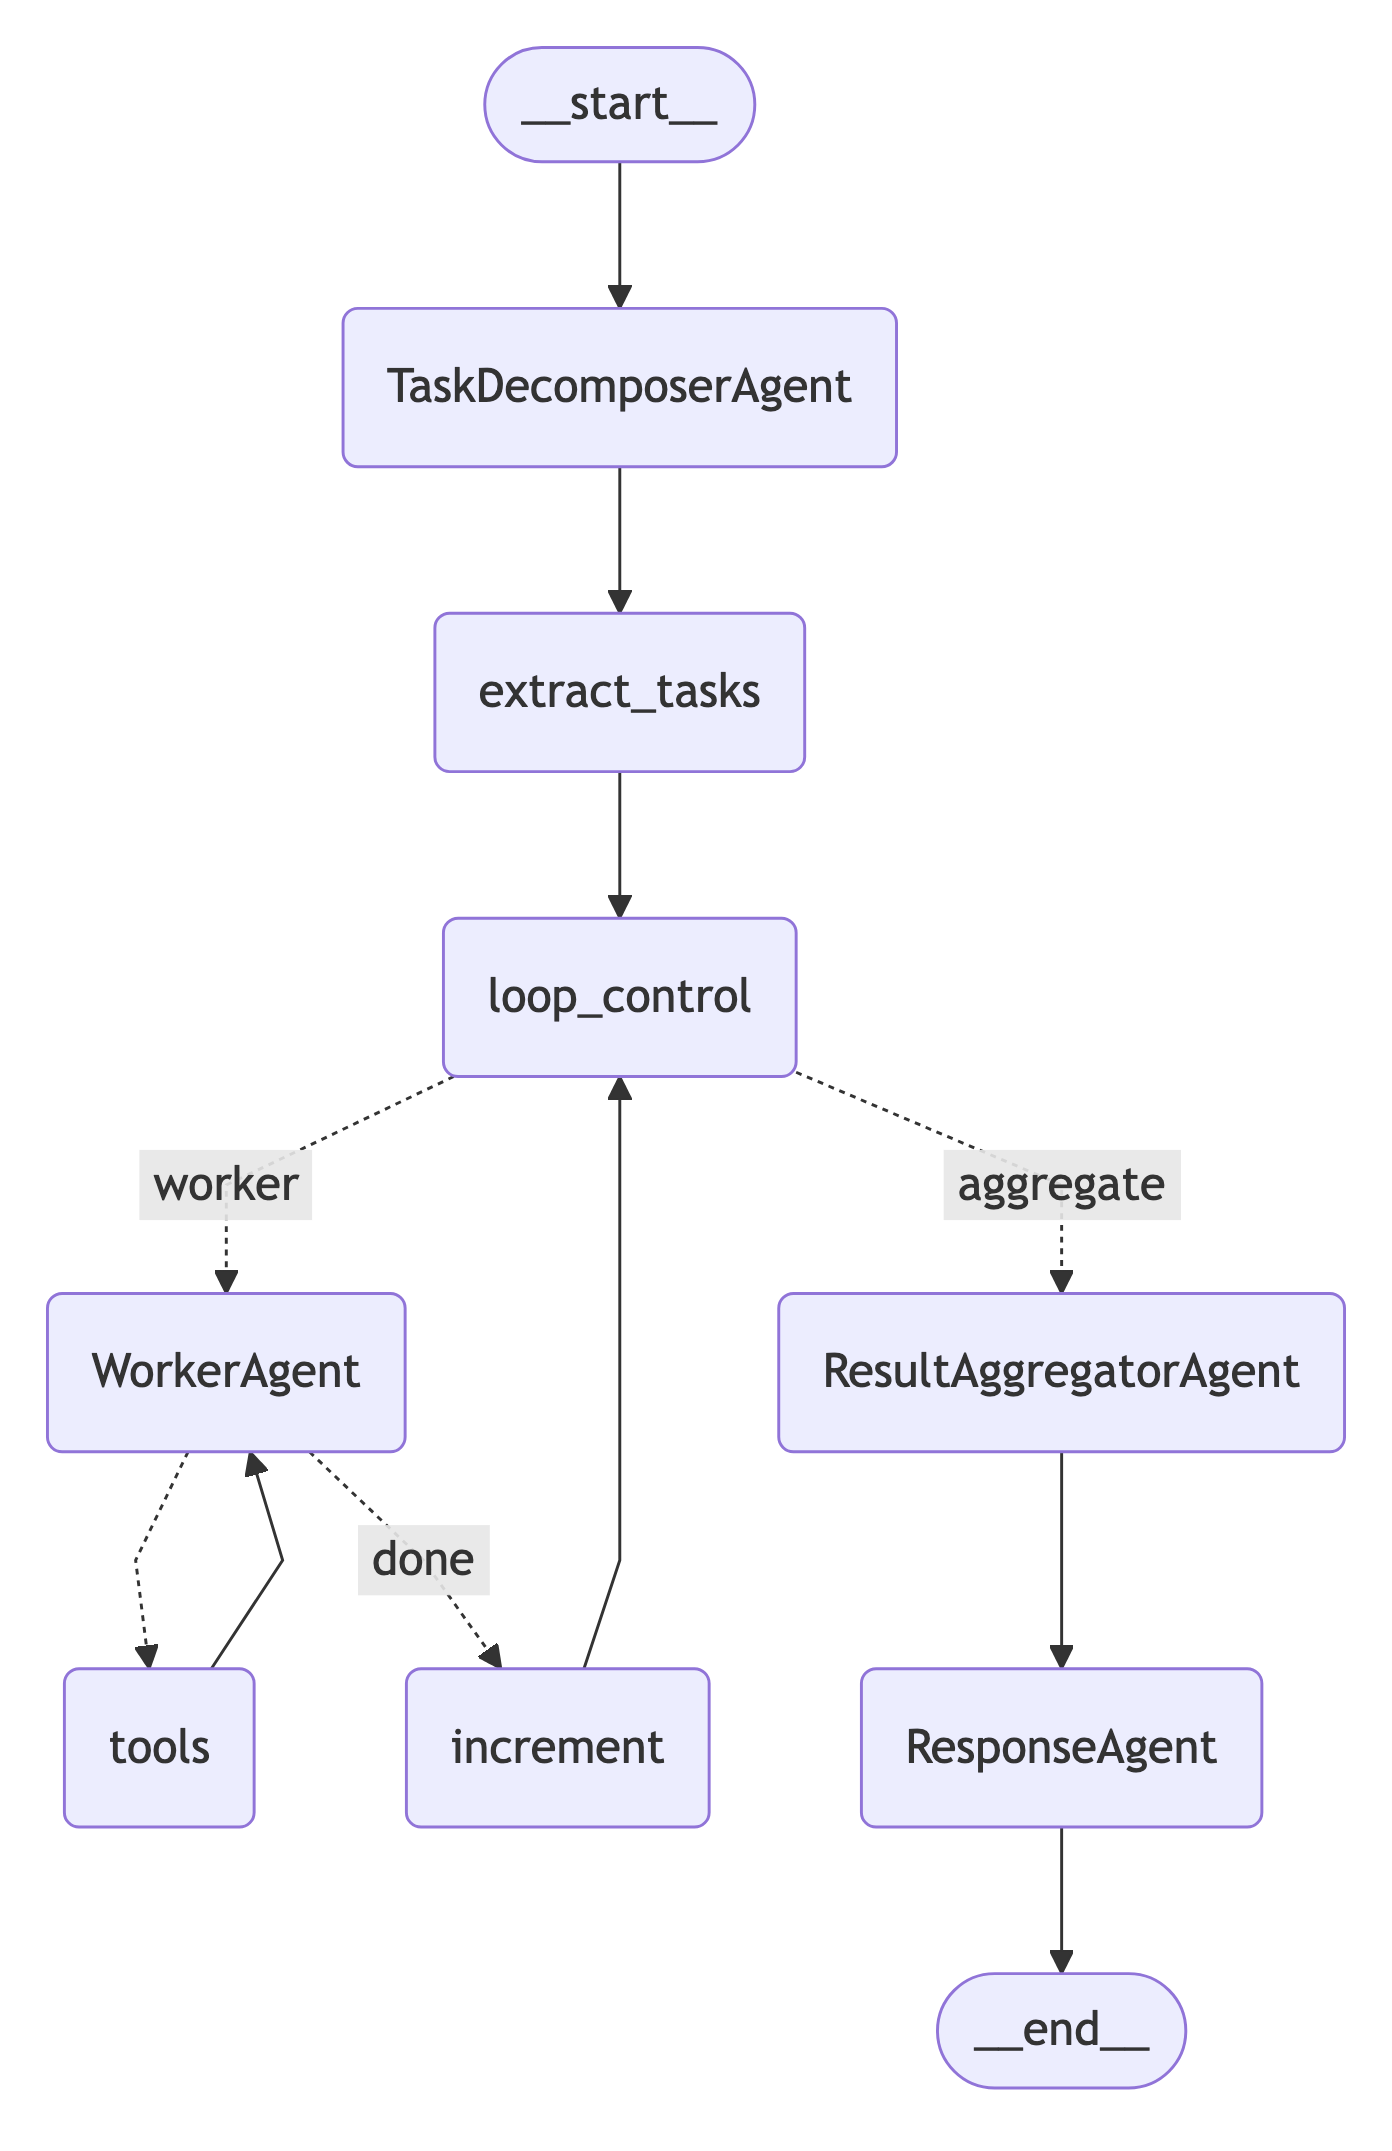

In [13]:
cca.visualize()

In [14]:
# Incorporate parameters from user's query
query = "Calculate the reaction enthalpy of this reaction: carbon monoxide + water -> carbon dioxide + hydrogen using GFN-2"
cca.run(query, config={"configurable": {"thread_id": "3"}})

*****TASK DECOMPOSER*****
messages: [{'role': 'system', 'content': '\nYou are an expert in computational chemistry and the manager responsible for decomposing user queries into subtasks.\n\nYour task:\n- Read the user\'s input and break it into a list of subtasks.\n- Each subtask must correspond to calculating a property **of a single molecule only** (e.g., energy, enthalpy, geometry).\n- Do NOT generate subtasks that involve combining or comparing results between multiple molecules (e.g., reaction enthalpy, binding energy, etc.).\n- Only generate molecule-specific calculations. Do not create any task that needs results from other tasks.\n- Each subtask must be independent.\n\nReturn each subtask as a dictionary with:\n  - `task_index`: a unique integer identifier\n  - `prompt`: a clear instruction for a worker agent.\n\nFormat:\n[\n  {"task_index": 1, "prompt": "Calculate the enthalpy of formation of carbon monoxide (CO) using mace_mp."},\n  {"task_index": 2, "prompt": "Calculate the 

[12:57:55] SMILES Parse Error: syntax error while parsing: H
[12:57:55] SMILES Parse Error: Failed parsing SMILES 'H' for input: 'H'
[12:57:57] WARNING: not removing hydrogen atom without neighbors


3
{'bond-orders': array([[0., 1.],
       [1., 0.]])}
{'bond-orders': array([[0., 1.],
       [1., 0.]]), 'molecular-dipole': array([1.11022302e-16, 0.00000000e+00, 0.00000000e+00])}
{'bond-orders': array([[0., 1.],
       [1., 0.]]), 'molecular-dipole': array([1.11022302e-16, 0.00000000e+00, 0.00000000e+00]), 'molecular-quadrupole': array([ 0.29226977,  0.        , -0.14613488,  0.        ,  0.        ,
       -0.14613488])}
      Step     Time          Energy          fmax
BFGS:    0 12:57:59      -26.667766        2.294829
3
{'bond-orders': array([[0., 1.],
       [1., 0.]])}
{'bond-orders': array([[0., 1.],
       [1., 0.]]), 'molecular-dipole': array([-2.22044605e-16,  0.00000000e+00,  0.00000000e+00])}
{'bond-orders': array([[0., 1.],
       [1., 0.]]), 'molecular-dipole': array([-2.22044605e-16,  0.00000000e+00,  0.00000000e+00]), 'molecular-quadrupole': array([ 0.33577908,  0.        , -0.16788954,  0.        ,  0.        ,
       -0.16788954])}
BFGS:    1 12:57:59      -26.740

HumanMessage(content='{"answer":{"value":-2.81,"property":"reaction enthalpy","unit":"eV"}}', additional_kwargs={}, response_metadata={}, id='ed3d6f60-715c-4406-93b7-b9054deee463')

In [7]:
# Incorporate parameters from user's query
query = "You are given a chemical reaction: 1 (Methane) + 2 (Oxygen) -> 1 (Carbon dioxide) + 2 (Water). Calculate the enthalpy for this reaction using GFN2-xTB."
cca.run(query, config={"configurable": {"thread_id": "1"}})

*****TASK DECOMPOSER*****
messages: [{'role': 'system', 'content': '\nYou are an expert in computational chemistry and the manager responsible for decomposing user queries into subtasks.\n\nYour task:\n- Read the user\'s input and break it into a list of subtasks.\n- Each subtask must correspond to calculating a property **of a single molecule only** (e.g., energy, enthalpy, geometry).\n- Do NOT generate subtasks that involve combining or comparing results between multiple molecules (e.g., reaction enthalpy, binding energy, etc.).\n- Only generate molecule-specific calculations. Do not create any task that needs results from other tasks.\n- Each subtask must be independent.\n\nReturn each subtask as a dictionary with:\n  - `task_index`: a unique integer identifier\n  - `prompt`: a clear instruction for a worker agent.\n\nFormat:\n[\n  {"task_index": 1, "prompt": "Calculate the enthalpy of formation of carbon monoxide (CO) using mace_mp."},\n  {"task_index": 2, "prompt": "Calculate the 

AIMessage(content='To calculate the enthalpy change for the reaction:\n\n\\[ \\text{1 CH}_4 + \\text{2 O}_2 \\rightarrow \\text{1 CO}_2 + \\text{2 H}_2\\text{O} \\]\n\nwe will use the enthalpies of formation for each of the reactants and products. The enthalpy change for the reaction (\\( \\Delta H_{reaction} \\)) can be calculated using the following formula:\n\n\\[\n\\Delta H_{reaction} = \\sum (\\Delta H_f \\text{ of products}) - \\sum (\\Delta H_f \\text{ of reactants})\n\\]\n\nFrom the outputs provided by the worker agents, we have the following enthalpies of formation:\n\n- **Methane (CH₄)**: \\( \\Delta H_f = -112.29 \\, \\text{eV} \\)\n- **Oxygen (O₂)**: \\( \\Delta H_f = -214.96 \\, \\text{eV} \\)\n- **Carbon Dioxide (CO₂)**: \\( \\Delta H_f = -280.08 \\, \\text{eV} \\)\n- **Water (H₂O)**: \\( \\Delta H_f = -137.33 \\, \\text{eV} \\)\n\nNow, we can calculate the enthalpy change for the reaction:\n\n1. **Calculate the total enthalpy of the products**:\n   - For 1 CO₂: \\( -280.

In [8]:
# Incorporate parameters from user's query
query = "You are given a chemical reaction: 1 (Nitrogen gas) + 3 (Hydrogen gas) -> 2 (Ammonia). Calculate the enthalpy for this reaction using GFN2-xTB."
cca.run(query, config={"configurable": {"thread_id": "2"}})

*****TASK DECOMPOSER*****
messages: [{'role': 'system', 'content': '\nYou are an expert in computational chemistry and the manager responsible for decomposing user queries into subtasks.\n\nYour task:\n- Read the user\'s input and break it into a list of subtasks.\n- Each subtask must correspond to calculating a property **of a single molecule only** (e.g., energy, enthalpy, geometry).\n- Do NOT generate subtasks that involve combining or comparing results between multiple molecules (e.g., reaction enthalpy, binding energy, etc.).\n- Only generate molecule-specific calculations. Do not create any task that needs results from other tasks.\n- Each subtask must be independent.\n\nReturn each subtask as a dictionary with:\n  - `task_index`: a unique integer identifier\n  - `prompt`: a clear instruction for a worker agent.\n\nFormat:\n[\n  {"task_index": 1, "prompt": "Calculate the enthalpy of formation of carbon monoxide (CO) using mace_mp."},\n  {"task_index": 2, "prompt": "Calculate the 

[11:58:45] SMILES Parse Error: syntax error while parsing: H2
[11:58:45] SMILES Parse Error: Failed parsing SMILES 'H2' for input: 'H2'
[11:58:48] WARNING: not removing hydrogen atom without neighbors


3
{'bond-orders': array([[0., 1.],
       [1., 0.]])}
{'bond-orders': array([[0., 1.],
       [1., 0.]]), 'molecular-dipole': array([1.11022302e-16, 0.00000000e+00, 0.00000000e+00])}
{'bond-orders': array([[0., 1.],
       [1., 0.]]), 'molecular-dipole': array([1.11022302e-16, 0.00000000e+00, 0.00000000e+00]), 'molecular-quadrupole': array([ 0.29226977,  0.        , -0.14613488,  0.        ,  0.        ,
       -0.14613488])}
      Step     Time          Energy          fmax
BFGS:    0 11:58:50      -26.667766        2.294829
3
{'bond-orders': array([[0., 1.],
       [1., 0.]])}
{'bond-orders': array([[0., 1.],
       [1., 0.]]), 'molecular-dipole': array([-2.22044605e-16,  0.00000000e+00,  0.00000000e+00])}
{'bond-orders': array([[0., 1.],
       [1., 0.]]), 'molecular-dipole': array([-2.22044605e-16,  0.00000000e+00,  0.00000000e+00]), 'molecular-quadrupole': array([ 0.33577908,  0.        , -0.16788954,  0.        ,  0.        ,
       -0.16788954])}
BFGS:    1 11:58:50      -26.740

AIMessage(content='To calculate the enthalpy change for the reaction:\n\n\\[ \\text{N}_2(g) + 3 \\text{H}_2(g) \\rightarrow 2 \\text{NH}_3(g) \\]\n\nwe will use the enthalpy of formation values obtained from the worker agents. The enthalpy change for the reaction can be calculated using the following formula:\n\n\\[\n\\Delta H_{\\text{reaction}} = \\sum \\Delta H_f (\\text{products}) - \\sum \\Delta H_f (\\text{reactants})\n\\]\n\n### Step 1: Gather the Enthalpy of Formation Values\nFrom the outputs provided:\n\n- **Enthalpy of Formation of N₂**: -156.60 eV\n- **Enthalpy of Formation of H₂**: -26.42 eV\n- **Enthalpy of Formation of NH₃**: -119.43 eV\n\n### Step 2: Calculate the Enthalpy Change\nNow, we can substitute these values into the formula:\n\n1. **Products**: \n   - For 2 moles of NH₃: \n   \\[\n   2 \\times (-119.43 \\, \\text{eV}) = -238.86 \\, \\text{eV}\n   \\]\n\n2. **Reactants**: \n   - For 1 mole of N₂: \n   \\[\n   1 \\times (-156.60 \\, \\text{eV}) = -156.60 \\, \\text